In [1]:
import importlib

import numpy as np
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from statistics import mean
import matplotlib.pyplot as plt
from sklearn.datasets import make_friedman1
import aux_Func as aux_Func
from sklearn.model_selection import train_test_split

In [2]:
# MACROS
NDATASETS = 50
N_TRAIN_SAMPLES = 15
NCVALUES = 20

In [3]:
DataMatrix = [ []*2 for i in range(NDATASETS)]
matrixDatasetTraintest =  [ []*4 for i in range(NDATASETS)]
matrixXYtrainparts =  [[[]*2 for j in range(N_TRAIN_SAMPLES)] for i in range(NDATASETS)]

In [4]:
DataMatrix = aux_Func.createDatasetRegression(NDATASETS, linear=False, nSamples=1000, nFeatures=10, noise=1)

In [5]:
for i in range(NDATASETS):
    X_train, X_test, y_train, y_test = train_test_split(DataMatrix[i][0], DataMatrix[i][1], random_state=4, test_size=0.20, shuffle=True)
    matrixDatasetTraintest[i].extend((X_train, X_test, y_train, y_test))

In [6]:
listTrainSamples = np.logspace(4, 7, num=N_TRAIN_SAMPLES, base=2)
listTrainSamples = [round(item, 0) for item in listTrainSamples]
listTrainSamples

[16.0,
 19.0,
 22.0,
 25.0,
 29.0,
 34.0,
 39.0,
 45.0,
 53.0,
 61.0,
 71.0,
 82.0,
 95.0,
 110.0,
 128.0]

In [7]:
for i in range(NDATASETS):
    for idx, el in enumerate(listTrainSamples):
        XtrainDivided = matrixDatasetTraintest[i][0][0:int(el)]
        
        YtrainDivided = matrixDatasetTraintest[i][2][0:int(el)]
        matrixXYtrainparts[i][idx].extend((XtrainDivided, YtrainDivided))

In [8]:
c_dict ={'c_value':np.logspace(-1, 7, num=NCVALUES, base=2)}
c_dict

{'c_value': array([  0.5       ,   0.66945205,   0.8963321 ,   1.20010272,
          1.60682245,   2.15138117,   2.88049308,   3.85670399,
          5.16375679,   6.91377515,   9.2568819 ,  12.39407714,
         16.59448071,  22.21841828,  29.74833136,  39.83016286,
         53.32876841,  71.40210674,  95.60057355, 128.        ])}

# SVM #

## SVM cambiando C ##

In [9]:
svms = []
matrixSVMResults = np.zeros([NDATASETS,N_TRAIN_SAMPLES,NCVALUES,2])


# Creamos los diferentes ridge regressors
for c_value in c_dict.get('c_value'):
    svms.append(SVR(C=float(c_value)))

print(svms)

for i in range(NDATASETS):
    for j in range(len(listTrainSamples)):
        for idx, svm in enumerate(svms):
            svm.fit(matrixXYtrainparts[i][j][0], matrixXYtrainparts[i][j][1])
            y_pred = svm.predict(matrixDatasetTraintest[i][1])
            
            matrixSVMResults[i][j][idx][0] = svm.C
            matrixSVMResults[i][j][idx][1] = r2_score(matrixDatasetTraintest[i][3], y_pred)

[SVR(C=0.5), SVR(C=0.6694520506122361), SVR(C=0.8963320961378558), SVR(C=1.2001027195781029), SVR(C=1.6068224531337647), SVR(C=2.151381172440365), SVR(C=2.880493075077518), SVR(C=3.85670399176998), SVR(C=5.163756791789619), SVR(C=6.913775146252844), SVR(C=9.256881898261756), SVR(C=12.394077138133248), SVR(C=16.59448071113907), SVR(C=22.218418281834488), SVR(C=29.748331360268995), SVR(C=39.83016286284875), SVR(C=53.328768409506836), SVR(C=71.40210673673876), SVR(C=95.60057354588706), SVR(C=128.0)]


In [10]:
np.save('matrices/matrixSVMResults', matrixSVMResults)

In [11]:
listmatrixSVMResults = []

for i in range(91):
    listmatrixSVMResults.append(np.load('matrices/matrixSVMResults'+str(i)+'.npy'))



## Dibujar Grafica ##

In [12]:
c_values = c_dict.get('c_value')
#r2_scores = [ []*25 for i in range(NSAMPLES)]
r2_scores = np.zeros([N_TRAIN_SAMPLES, NCVALUES])

#MatrixRidgeResultsInvertida =  [[[]*2 for j in range(NSAMPLES)] for i in range(25)]
MatrixSVMResultsInvertida = np.zeros([NCVALUES, N_TRAIN_SAMPLES, 2])
listMatrixSVMResultsInvertida = []
num_dataset = 2

for i_sample in range(N_TRAIN_SAMPLES):
    for i_alphavalue in range(NCVALUES):
        for i_dataset in range(NDATASETS):
            for matrixSVMResults in listmatrixSVMResults:
                listR2ScoreDataset = []
                listR2ScoreDataset.append(matrixSVMResults[i_dataset][i_sample][i_alphavalue][1])
                MatrixSVMResultsInvertida[i_alphavalue][i_sample][0] = matrixSVMResults[i_dataset][i_sample][i_alphavalue][0]
                MatrixSVMResultsInvertida[i_alphavalue][i_sample][1] = mean(listR2ScoreDataset)
                listMatrixSVMResultsInvertida.append(MatrixSVMResultsInvertida)



for idx_sample in range(N_TRAIN_SAMPLES):
    for idx_alphavalue in range(NCVALUES):
        list_r2_score = []
        for MatrixSVMResultsInvertida in listMatrixSVMResultsInvertida:
            list_r2_score.append(MatrixSVMResultsInvertida[idx_alphavalue][idx_sample][1])
        
        r2_scores[idx_sample][idx_alphavalue] = mean(list_r2_score)




### Dibujar Cambiando C ###

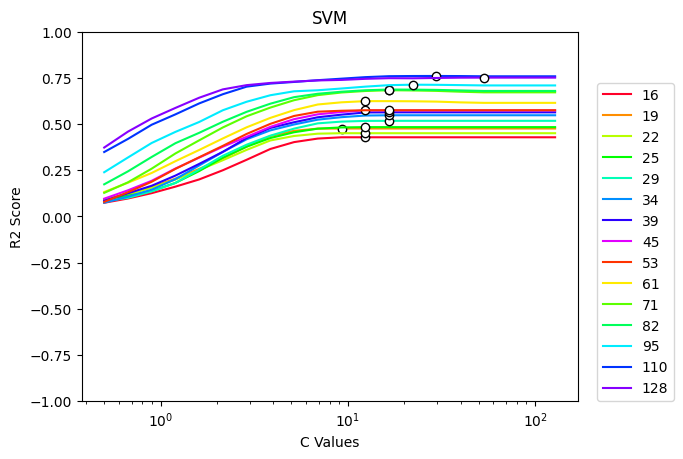

In [13]:
f, ax = plt.subplots(1)

ax.set_ylim(ymin=-1)
cm = plt.get_cmap('gist_rainbow')
ax.set_prop_cycle('color', [cm(1.*i/15) for i in range(N_TRAIN_SAMPLES)])

plt.xscale('log')
plt.title("SVM")
plt.xlabel("C Values")
plt.ylabel("R2 Score")


for i_sample in range(N_TRAIN_SAMPLES):
    plt.plot(c_values, r2_scores[i_sample], label = str(int(listTrainSamples[i_sample])))
    maxValue = np.amax(r2_scores[i_sample])
    i_maxValue = np.where(r2_scores[i_sample] == maxValue)
    plt.plot(c_values[i_maxValue][0], maxValue, marker = "o", markeredgecolor = "black", markerfacecolor="white")
plt.legend(loc=(1.04, 0),title="Samples")
plt.show(f)